In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 9 ##

## Review of plots: welcome survey ##

In [2]:
survey = Table.read_table('welcome_survey.csv')

In [3]:
survey

Extraversion,Number of Texters,Hours of Sleep,Pant Leg Order,Handedness
5,3,7,Right leg in first,Right-handed
1,2,7.5,Left leg in first,Right-handed
4,5,6,Left leg in first,Right-handed
8,3,7,Left leg in first,Right-handed
3,2,6,I don't know,Right-handed
3,4,8,Right leg in first,Right-handed
2,0,10,I don't know,Right-handed
7,6,6,Right leg in first,Right-handed
5,4,8,Left leg in first,Right-handed
5,5,8,Left leg in first,Right-handed


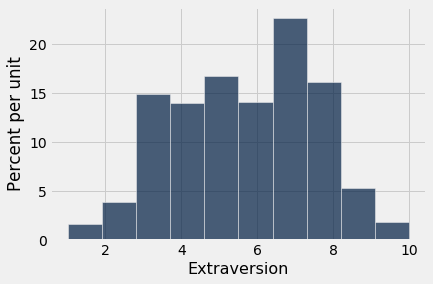

In [4]:
survey.hist('Extraversion')

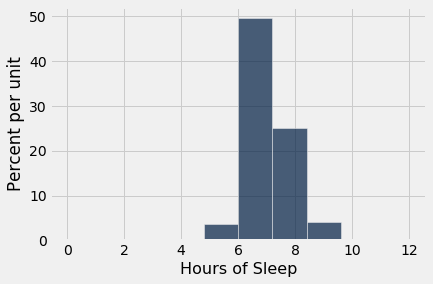

In [5]:
survey.hist('Hours of Sleep')

In [7]:
max(survey.column('Hours of Sleep'))

12.0

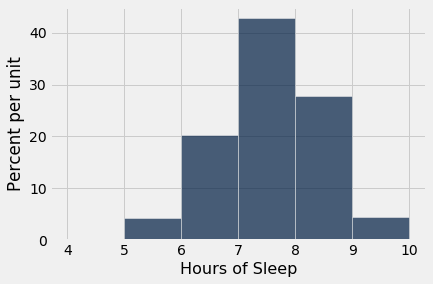

In [9]:
survey.hist('Hours of Sleep', bins=np.arange(4, 11, 1))
# [8, 9)

In [10]:
survey.bin('Hours of Sleep', bins=make_array(0,8,15))

bin,Hours of Sleep count
0,983
8,466
15,0


In [11]:
466/(466 + 983) * 100

32.16011042097999

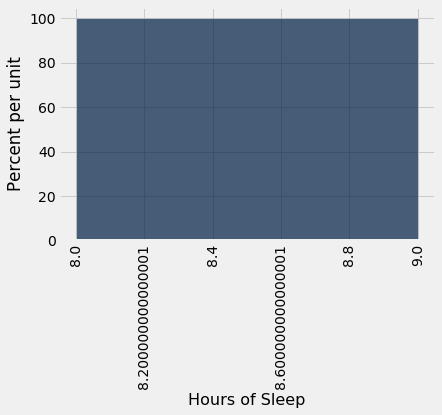

In [12]:
survey.hist('Hours of Sleep', bins=np.arange(8, 10, 1))


In [16]:
np.median(survey.column('Number of Texters'))

5.0

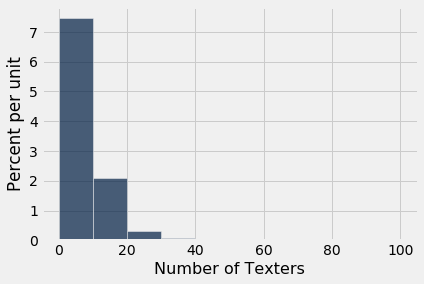

In [17]:
survey.hist('Number of Texters')

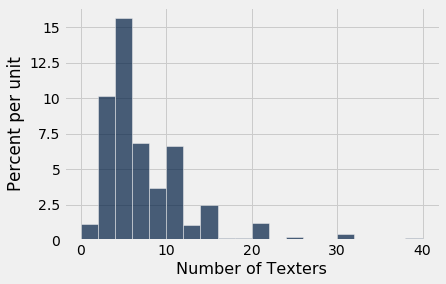

In [19]:
survey.hist('Number of Texters', bins=np.arange(0,42,2))

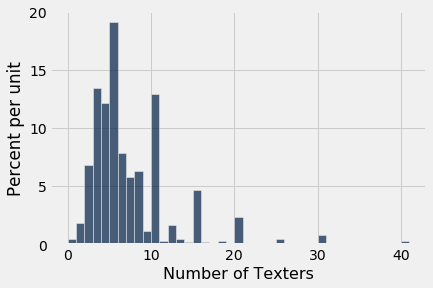

In [20]:
survey.hist('Number of Texters', bins=np.arange(0,42,1))

In [21]:
survey.bar('Handedness')

ValueError: The column 'Pant Leg Order' contains non-numerical values. A plot cannot be drawn for this column.

In [23]:
handedness = survey.group('Handedness')
handedness

Handedness,count
Ambidextrous / It's Complicated,23
Left-handed,122
Right-handed,1304


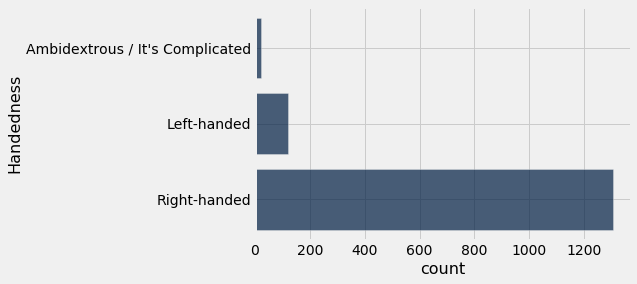

In [28]:
handedness.barh('Handedness')

## Histogram review: heights and heredity ##

In [29]:
galton = Table.read_table('galton.csv')

In [30]:
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


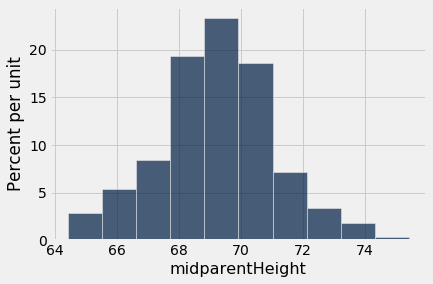

In [31]:
galton.hist('midparentHeight')

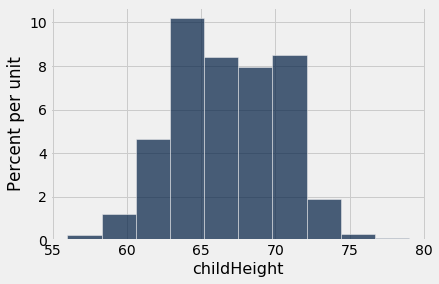

In [32]:
galton.hist('childHeight')

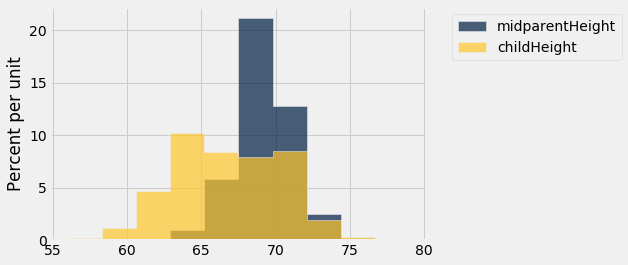

In [34]:
galton.hist('midparentHeight', 'childHeight')

## Functions ##

In [35]:
def double(x):
    return 2 * x

In [36]:
double(3)

6

In [37]:
num = 4

In [38]:
double(num)

8

In [39]:
double(num * 5)

40

In [40]:
double('data')

'datadata'

In [41]:
double(np.arange(4))

array([0, 2, 4, 6])

In [42]:
x

NameError: name 'x' is not defined

In [44]:
x = 5

In [45]:
double(2 * x)

20

In [46]:
x

5

In [49]:
def percent_of_total(s):
    return np.round(s / sum(s) * 100, 2)

In [50]:
percent_of_total(make_array(1,2,3,4))

array([10., 20., 30., 40.])

In [51]:
percent_of_total(make_array(1, 213, 38))

array([ 0.4 , 84.52, 15.08])

## Apply ##

In [52]:
ages = Table().with_column(
    'Person', make_array('A', 'B', 'C', 'D'),
    'Age', make_array(63, 110, 99, 102)
)
ages

Person,Age
A,63
B,110
C,99
D,102


In [53]:
def cap_at_100(x):
    return min(x, 100)

In [54]:
cap_at_100(43)

43

In [55]:
cap_at_100(105)

100

In [56]:
ages.apply(cap_at_100, 'Age')

array([ 63, 100,  99, 100])

In [59]:
def concat(x, y):
    return x + str(y)

In [60]:
ages.apply(concat, 'Person', 'Age')

array(['A63', 'B110', 'C99', 'D102'], dtype='<U4')

In [61]:
def triple(x):
    x = 3 * x

In [65]:
x = 3

In [66]:
triple(x)

In [67]:
x

3